# Start H2O

In [1]:
# Start and connect to a local H2O cluster
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_72"; Java(TM) SE Runtime Environment (build 1.8.0_72-b15); Java HotSpot(TM) 64-Bit Server VM (build 25.72-b15, mixed mode)
  Starting server from /Users/jofaichow/anaconda/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/4z/p7yt7_4n4fj1jlyq6g4qhfbw0000gn/T/tmpgvlf2589
  JVM stdout: /var/folders/4z/p7yt7_4n4fj1jlyq6g4qhfbw0000gn/T/tmpgvlf2589/h2o_jofaichow_started_from_python.out
  JVM stderr: /var/folders/4z/p7yt7_4n4fj1jlyq6g4qhfbw0000gn/T/tmpgvlf2589/h2o_jofaichow_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Europe/Amsterdam
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.1
H2O cluster version age:,"7 days, 2 hours and 54 minutes"
H2O cluster name:,H2O_from_python_jofaichow_13ojij
H2O cluster total nodes:,1
H2O cluster free memory:,3.556 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


# Import Data

In [2]:
# Import house price data from GitHub
train = h2o.import_file("https://github.com/woobe/h2o_training_2018_02/raw/master/examples/classification/smartphone_sensors_train.csv.zip?raw=true")
test = h2o.import_file("https://github.com/woobe/h2o_training_2018_02/raw/master/examples/classification/smartphone_sensors_test.csv.zip?raw=true")

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [3]:
# Alternatively, import data locally
# train = h2o.import_file("smartphone_sensors_train.csv.zip")
# test = h2o.import_file("smartphone_sensors_test.csv.zip")

In [4]:
# Have a quick look
train.head(5)

activity,f1_tBodyAccmeanX,f2_tBodyAccmeanY,f3_tBodyAccmeanZ,f4_tBodyAccstdX,f5_tBodyAccstdY,f6_tBodyAccstdZ,f7_tBodyAccmadX,f8_tBodyAccmadY,f9_tBodyAccmadZ,f10_tBodyAccmaxX,f11_tBodyAccmaxY,f12_tBodyAccmaxZ,f13_tBodyAccminX,f14_tBodyAccminY,f15_tBodyAccminZ,f16_tBodyAccsma,f17_tBodyAccenergyX,f18_tBodyAccenergyY,f19_tBodyAccenergyZ,f20_tBodyAcciqrX,f21_tBodyAcciqrY,f22_tBodyAcciqrZ,f23_tBodyAccentropyX,f24_tBodyAccentropyY,f25_tBodyAccentropyZ,f26_tBodyAccarCoeffX1,f27_tBodyAccarCoeffX2,f28_tBodyAccarCoeffX3,f29_tBodyAccarCoeffX4,f30_tBodyAccarCoeffY1,f31_tBodyAccarCoeffY2,f32_tBodyAccarCoeffY3,f33_tBodyAccarCoeffY4,f34_tBodyAccarCoeffZ1,f35_tBodyAccarCoeffZ2,f36_tBodyAccarCoeffZ3,f37_tBodyAccarCoeffZ4,f38_tBodyAcccorrelationXY,f39_tBodyAcccorrelationXZ,f40_tBodyAcccorrelationYZ,f41_tGravityAccmeanX,f42_tGravityAccmeanY,f43_tGravityAccmeanZ,f44_tGravityAccstdX,f45_tGravityAccstdY,f46_tGravityAccstdZ,f47_tGravityAccmadX,f48_tGravityAccmadY,f49_tGravityAccmadZ,f50_tGravityAccmaxX,f51_tGravityAccmaxY,f52_tGravityAccmaxZ,f53_tGravityAccminX,f54_tGravityAccminY,f55_tGravityAccminZ,f56_tGravityAccsma,f57_tGravityAccenergyX,f58_tGravityAccenergyY,f59_tGravityAccenergyZ,f60_tGravityAcciqrX,f61_tGravityAcciqrY,f62_tGravityAcciqrZ,f63_tGravityAccentropyX,f64_tGravityAccentropyY,f65_tGravityAccentropyZ,f66_tGravityAccarCoeffX1,f67_tGravityAccarCoeffX2,f68_tGravityAccarCoeffX3,f69_tGravityAccarCoeffX4,f70_tGravityAccarCoeffY1,f71_tGravityAccarCoeffY2,f72_tGravityAccarCoeffY3,f73_tGravityAccarCoeffY4,f74_tGravityAccarCoeffZ1,f75_tGravityAccarCoeffZ2,f76_tGravityAccarCoeffZ3,f77_tGravityAccarCoeffZ4,f78_tGravityAcccorrelationXY,f79_tGravityAcccorrelationXZ,f80_tGravityAcccorrelationYZ,f81_tBodyAccJerkmeanX,f82_tBodyAccJerkmeanY,f83_tBodyAccJerkmeanZ,f84_tBodyAccJerkstdX,f85_tBodyAccJerkstdY,f86_tBodyAccJerkstdZ,f87_tBodyAccJerkmadX,f88_tBodyAccJerkmadY,f89_tBodyAccJerkmadZ,f90_tBodyAccJerkmaxX,f91_tBodyAccJerkmaxY,f92_tBodyAccJerkmaxZ,f93_tBodyAccJerkminX,f94_tBodyAccJerkminY,f95_tBodyAccJerkminZ,f96_tBodyAccJerksma,f97_tBodyAccJerkenergyX,f98_tBodyAccJerkenergyY,f99_tBodyAccJerkenergyZ,f100_tBodyAccJerkiqrX,f101_tBodyAccJerkiqrY,f102_tBodyAccJerkiqrZ,f103_tBodyAccJerkentropyX,f104_tBodyAccJerkentropyY,f105_tBodyAccJerkentropyZ,f106_tBodyAccJerkarCoeffX1,f107_tBodyAccJerkarCoeffX2,f108_tBodyAccJerkarCoeffX3,f109_tBodyAccJerkarCoeffX4,f110_tBodyAccJerkarCoeffY1,f111_tBodyAccJerkarCoeffY2,f112_tBodyAccJerkarCoeffY3,f113_tBodyAccJerkarCoeffY4,f114_tBodyAccJerkarCoeffZ1,f115_tBodyAccJerkarCoeffZ2,f116_tBodyAccJerkarCoeffZ3,f117_tBodyAccJerkarCoeffZ4,f118_tBodyAccJerkcorrelationXY,f119_tBodyAccJerkcorrelationXZ,f120_tBodyAccJerkcorrelationYZ,f121_tBodyGyromeanX,f122_tBodyGyromeanY,f123_tBodyGyromeanZ,f124_tBodyGyrostdX,f125_tBodyGyrostdY,f126_tBodyGyrostdZ,f127_tBodyGyromadX,f128_tBodyGyromadY,f129_tBodyGyromadZ,f130_tBodyGyromaxX,f131_tBodyGyromaxY,f132_tBodyGyromaxZ,f133_tBodyGyrominX,f134_tBodyGyrominY,f135_tBodyGyrominZ,f136_tBodyGyrosma,f137_tBodyGyroenergyX,f138_tBodyGyroenergyY,f139_tBodyGyroenergyZ,f140_tBodyGyroiqrX,f141_tBodyGyroiqrY,f142_tBodyGyroiqrZ,f143_tBodyGyroentropyX,f144_tBodyGyroentropyY,f145_tBodyGyroentropyZ,f146_tBodyGyroarCoeffX1,f147_tBodyGyroarCoeffX2,f148_tBodyGyroarCoeffX3,f149_tBodyGyroarCoeffX4,f150_tBodyGyroarCoeffY1,f151_tBodyGyroarCoeffY2,f152_tBodyGyroarCoeffY3,f153_tBodyGyroarCoeffY4,f154_tBodyGyroarCoeffZ1,f155_tBodyGyroarCoeffZ2,f156_tBodyGyroarCoeffZ3,f157_tBodyGyroarCoeffZ4,f158_tBodyGyrocorrelationXY,f159_tBodyGyrocorrelationXZ,f160_tBodyGyrocorrelationYZ,f161_tBodyGyroJerkmeanX,f162_tBodyGyroJerkmeanY,f163_tBodyGyroJerkmeanZ,f164_tBodyGyroJerkstdX,f165_tBodyGyroJerkstdY,f166_tBodyGyroJerkstdZ,f167_tBodyGyroJerkmadX,f168_tBodyGyroJerkmadY,f169_tBodyGyroJerkmadZ,f170_tBodyGyroJerkmaxX,f171_tBodyGyroJerkmaxY,f172_tBodyGyroJerkmaxZ,f173_tBodyGyroJerkminX,f174_tBodyGyroJerkminY,f175_tBodyGyroJerkminZ,f176_tBodyGyroJerksma,f177_tBodyGyroJerkenergyX,f178_tBodyGyroJerkenergyY,f179_tBodyGyroJerkenergyZ,f180_tBodyG

# Define Features

In [5]:
# Define features (or predictors)
features = list(train.columns) # we want to use all the information
features.remove('activity')    # we need to exclude the target 'activity' (otherwise there is nothing to predict)
features

['f1_tBodyAccmeanX',
 'f2_tBodyAccmeanY',
 'f3_tBodyAccmeanZ',
 'f4_tBodyAccstdX',
 'f5_tBodyAccstdY',
 'f6_tBodyAccstdZ',
 'f7_tBodyAccmadX',
 'f8_tBodyAccmadY',
 'f9_tBodyAccmadZ',
 'f10_tBodyAccmaxX',
 'f11_tBodyAccmaxY',
 'f12_tBodyAccmaxZ',
 'f13_tBodyAccminX',
 'f14_tBodyAccminY',
 'f15_tBodyAccminZ',
 'f16_tBodyAccsma',
 'f17_tBodyAccenergyX',
 'f18_tBodyAccenergyY',
 'f19_tBodyAccenergyZ',
 'f20_tBodyAcciqrX',
 'f21_tBodyAcciqrY',
 'f22_tBodyAcciqrZ',
 'f23_tBodyAccentropyX',
 'f24_tBodyAccentropyY',
 'f25_tBodyAccentropyZ',
 'f26_tBodyAccarCoeffX1',
 'f27_tBodyAccarCoeffX2',
 'f28_tBodyAccarCoeffX3',
 'f29_tBodyAccarCoeffX4',
 'f30_tBodyAccarCoeffY1',
 'f31_tBodyAccarCoeffY2',
 'f32_tBodyAccarCoeffY3',
 'f33_tBodyAccarCoeffY4',
 'f34_tBodyAccarCoeffZ1',
 'f35_tBodyAccarCoeffZ2',
 'f36_tBodyAccarCoeffZ3',
 'f37_tBodyAccarCoeffZ4',
 'f38_tBodyAcccorrelationXY',
 'f39_tBodyAcccorrelationXZ',
 'f40_tBodyAcccorrelationYZ',
 'f41_tGravityAccmeanX',
 'f42_tGravityAccmeanY',
 'f43_tGr

# Generalized Linear Model (GLM)

In [6]:
# Build a Generalized Linear Model (GLM) with default settings

# Import the function for GLM
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

# Set up GLM for regression
glm_default = H2OGeneralizedLinearEstimator(family = 'multinomial', model_id = 'glm_default')

# Use .train() to build the model
glm_default.train(x = features, 
                  y = 'activity', 
                  training_frame = train)

glm Model Build progress: |███████████████████████████████████████████████| 100%


# Distributed Random Forest (DRF)

In [7]:
# Build a Distributed Random Forest (DRF) model with default settings

# Import the function for DRF
from h2o.estimators.random_forest import H2ORandomForestEstimator

# Set up DRF for regression
# Add a seed for reproducibility
drf_default = H2ORandomForestEstimator(model_id = 'drf_default', seed = 1234)

# Use .train() to build the model
drf_default.train(x = features, 
                  y = 'activity', 
                  training_frame = train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


# Gradient Boosting Machine (GBM)

In [8]:
# Build a Gradient Boosting Machines (GBM) model with default settings

# Import the function for GBM
from h2o.estimators.gbm import H2OGradientBoostingEstimator

# Set up GBM for regression
# Add a seed for reproducibility
gbm_default = H2OGradientBoostingEstimator(model_id = 'gbm_default', seed = 1234)

# Use .train() to build the model
gbm_default.train(x = features, 
                  y = 'activity', 
                  training_frame = train)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


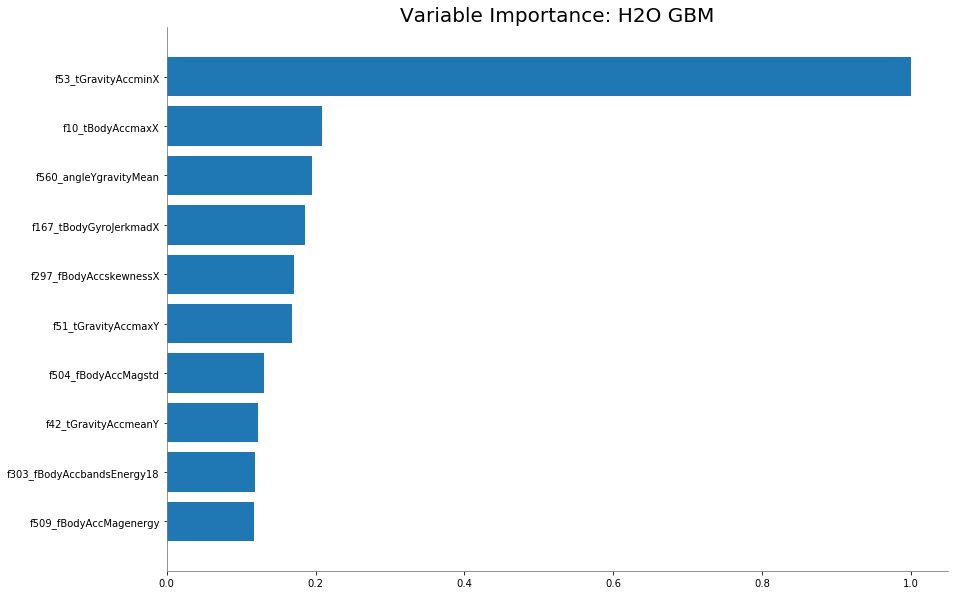

In [9]:
gbm_default.varimp_plot()

# Deep Neural Networks (DNN)

In [10]:
# Build a Deep Learning (Deep Neural Networks, DNN) model with default settings

# Import the function for DNN
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

# Set up DNN for regression
dnn_default = H2ODeepLearningEstimator(model_id = 'dnn_default')

# (not run) Change 'reproducible' to True if you want to reproduce the results
# The model will be built using a single thread (could be very slow)
# dnn_default = H2ODeepLearningEstimator(model_id = 'dnn_default', reproducible = True)

# Use .train() to build the model
dnn_default.train(x = features, 
                  y = 'activity', 
                  training_frame = train)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


# AutoML

In [11]:
# Build multiple H2O models and stacked ensembles with AutoML

# Import the function
from h2o.automl import H2OAutoML

# Run AutoML for 120 seconds
aml = H2OAutoML(max_runtime_secs = 120)

aml.train(x = features, 
          y = 'activity',
          training_frame = train)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb

AutoML progress: |████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


model_id,mean_per_class_error
StackedEnsemble_BestOfFamily_0_AutoML_20180220_073229,0.014265
StackedEnsemble_AllModels_0_AutoML_20180220_073229,0.014265
GLM_grid_0_AutoML_20180220_073229_model_0,0.019243
DRF_0_AutoML_20180220_073229,0.023591
XRT_0_AutoML_20180220_073229,0.025835


# Evaluate

In [12]:
aml.leader.model_performance(test)


ModelMetricsMultinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.03439336353721497
RMSE: 0.18545447834230094


# Make Predictions

In [13]:
yhat_test = aml.leader.predict(test)
yhat_test.head(5)

stackedensemble prediction progress: |████████████████████████████████████| 100%


predict,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
STANDING,8.13346e-05,0.00297306,0.996556,0.000103073,0.000154333,0.000131849
STANDING,8.79008e-05,0.00394022,0.995553,0.00011099,0.000166061,0.000141903
STANDING,8.26771e-05,0.00299169,0.996531,0.000104682,0.000156552,0.000133769
STANDING,9.70943e-05,0.00431816,0.995121,0.000122962,0.000184032,0.000157237
STANDING,7.14049e-05,0.00231262,0.997274,9.05288e-05,0.000135506,0.000115772
